In [1]:
using PyPlot

INFO: Loading help data...


## A nonquadratic problem in $R^2$

More about this problem can be found in Chapter 9 in Boyd and Vandenberghe.

We consider
$$ 
    \min_{x \in R^2} f(x) \text{ with } f(x) = \exp(x_1 + 3 x_2 - 0.1) + \exp(x_1 - 3 x_2 - 0.1) + \exp(-x_1 - 0.1).
$$

Before, we apply the Gradient and Newton's method, let us note that $f$ is convex, since we have a (non-negative) sum of linearly scaled convex functions.

The partial derivatives of $f$ are
\begin{align}
 \partial_{x_1} f(x) & = \exp(x_1 + 3 x_2 - 0.1) + \exp(x_1 - 3 x_2 - 0.1) - \exp(-x_1 - 0.1) \\
\partial_{x_2} f(x)  & = 3 \exp(x_1 + 3 x_2 - 0.1) - 3 \exp(x_1 - 3 x_2 - 0.1).
\end{align}
The Hessian is
$$
    \nabla^2 f(x) = \left(\begin{array}{cc} 
            \exp(x_1+3 x_2 - 0.1) + \exp(x_1 - 3 x_2 - 0.1) + \exp(-x_1 - 0.1) & 3 \exp(x_1 + 3 x_2 - 0.1) - 3 \exp(x_1 - 3 x_2 - 0.1)\\
        3 \exp(x_1 + 3 x_2 - 0.1) - 3 \exp(x_1 - 3 x_2 - 0.1) & 9 \exp(x_1 + 3 x_2 - 0.1) + 9 \exp(x_1 - 3 x_2 - 0.1)
        \end{array}\right).
$$


## Defining functions

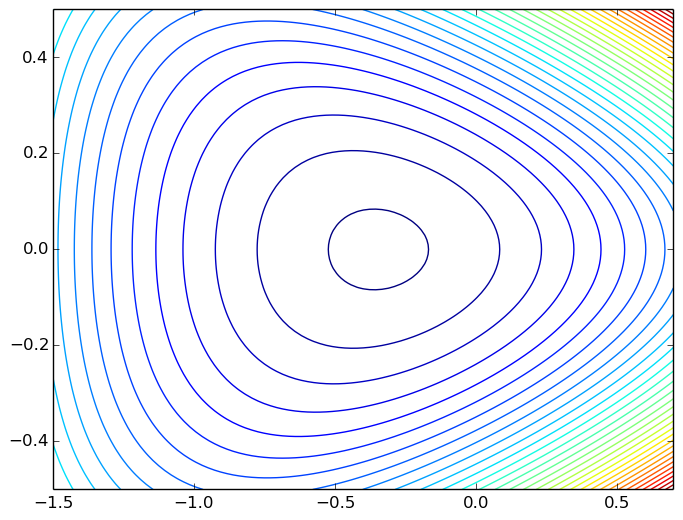

PyObject <matplotlib.contour.QuadContourSet instance at 0x7fc8b7458ef0>

In [2]:
f(x)  = exp(x[1]+3*x[2]-0.1)+exp(x[1]-3*x[2]-0.1)+exp(-x[1]-0.1)
df(x) = [
            exp(x[1]+3*x[2]-0.1)+exp(x[1]-3*x[2]-0.1)-exp(-x[1]-0.1);
            3*exp(x[1]+3*x[2]-0.1)-3*exp(x[1]-3*x[2]-0.1);
        ]
d2f(x)  = [
            exp(x[1]+3*x[2]-0.1)+exp(x[1]-3*x[2]-0.1)+exp(-x[1]-0.1)   3*exp(x[1]+3*x[2]-0.1)-3*exp(x[1]-3*x[2]-0.1);
            3*exp(x[1]+3*x[2]-0.1)-3*exp(x[1]-3*x[2]-0.1)              9*exp(x[1]+3*x[2]-0.1)+9*exp(x[1]-3*x[2]-0.1);  
        ]
x1 = linspace(-1.5,0.7,101)
x2 = linspace(-0.5,0.5,101)
fx = float([f([x1[i];x2[j];]) for i=1:length(x1), j=1:length(x2)])
contour(x1,x2,fx',40)

## Using the Gradient Descent Method

The following code uses the function ``gd`` in the file ``optiFuncs.jl``. Make sure to include it. The function looks like this

```
function gd(f::Function,df::Function,x::Vector;maxIter=20,atol=1e-8,doPrint=false,ls::Function=armijo)
    .
    .
    .
    return x,his,X
end
```


solution=(-0.34657,0.00000) with function value of 2.5592666967

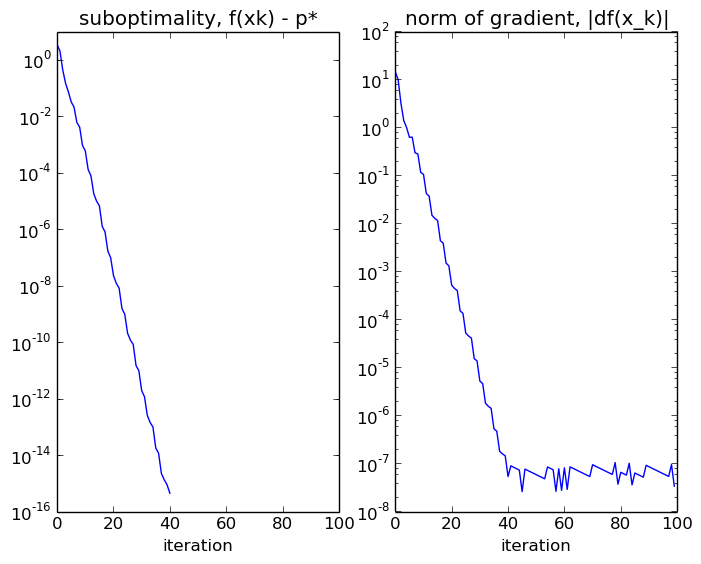

In [3]:
include("/home/juser/math346/optiFuncs.jl")
myLS(f,fc,df,x,pk) =  armijo(f,fc,df,x,pk,alpha=1e-1,b=0.7,maxIter=200)
x0 = [.5;.4]
xgd,hisgd,Xgd = gd(f,df,x0,maxIter=100,doPrint=false,ls=myLS);

subplot(1,2,1)
semilogy(hisgd[:,1]-hisgd[end,1])
title("suboptimality, f(xk) - p*")
xlabel("iteration")
subplot(1,2,2)
semilogy(hisgd[:,2])
title("norm of gradient, |df(x_k)|")
xlabel("iteration")

@printf "solution=(%1.5f,%1.5f) with function value of %1.10f" xgd[1] xgd[2] hisgd[end,1]

The above plot shows the convergence of the Gradient Descent method. We see that the suboptimality decreases in each iteration (left) and that the norm of the gradient also decreases (right). Interestingly, the suboptimality improves almost until machine precision $10^{-6}$ whereas the norm of the gradient improves only up to $10^{-8} = \sqrt{10^{-16}}$. This can also be proven rigorously. Let me know if you are interested. Below you can see the first 60 iterates and the expected zig-zagging.

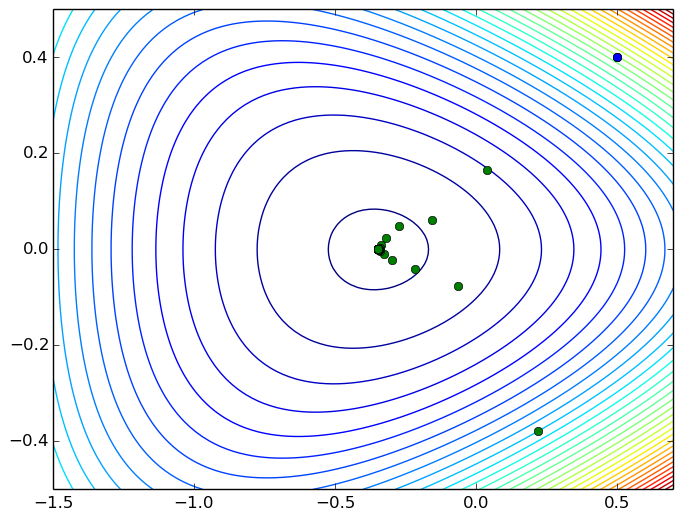

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff385895290>

In [79]:
contour(x1,x2,fx',40,hold=true)
plot(Xgd[1,1:60]',Xgd[2,1:60]',"og")
plot(x0[1],x0[2],"ob")


# Newton's method

we now apply Newton's method (with fixed line search of $1$) to the problem. The function we call also is contained in ``optiFuncs.jl``. The function looks like
```
function newton(f::Function,df::Function,H::Function,x::Vector;maxIter=20,atol=1e-8,doPrint=false)
    .
    .
    .
    return x,his,X
end
```

iter=0001	|f|=5.95e+00	|df|=1.44e+01
iter=0002	|f|=3.30e+00	|df|=4.93e+00
iter=0003	|f|=2.64e+00	|df|=1.25e+00
iter=0004	|f|=2.56e+00	|df|=1.55e-01
iter=0005	|f|=2.56e+00	|df|=2.74e-03
iter=0006	|f|=2.56e+00	|df|=9.74e-07
iter=0007	|f|=2.56e+00	|df|=1.11e-13
solution=(-0.34657,-0.00000) with function value of 2.5592666967

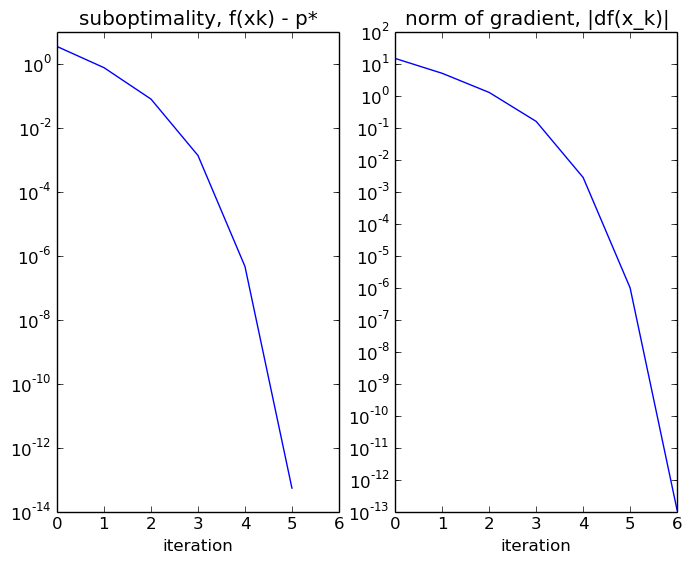

In [5]:
x0 = [.5;.4]
xnt,hisnt,Xnt = newton(f,df,d2f,x0,maxIter=10,doPrint=true,atol=1e-20)


subplot(1,2,1)
semilogy(hisnt[:,1]-hisnt[end,1])
title("suboptimality, f(xk) - p*")
xlabel("iteration")
subplot(1,2,2)
semilogy(hisnt[:,2])
title("norm of gradient, |df(x_k)|")
xlabel("iteration")

@printf "solution=(%1.5f,%1.5f) with function value of %1.10f" xnt[1] xnt[2] hisnt[end,1]

Convergence for Newton's method is much faster than for the Gradient Descent method. We reach machine precision very quickly. Below you see the iterates, which show no zig-zagging, but approach the solution directly.

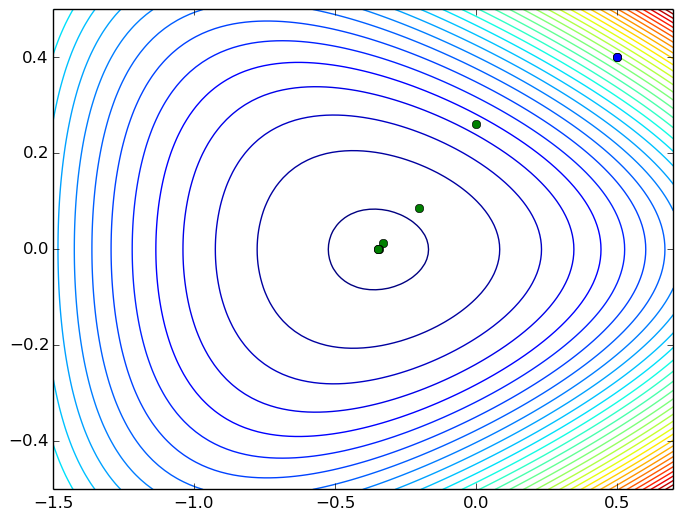

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff384774c50>

In [94]:
contour(x1,x2,fx',40,hold=true)
plot(Xnt[1,:]',Xnt[2,:]',"og")
plot(x0[1],x0[2],"ob")


## Summary and Experiments

This example shows why Newton's method is very attractive for unconstrained convex optimization. It converges rapidly to the solution and there is no need for line search. If you like, do a few experiments on your own:
1. Play with different parameters for the line search in Gradient Descent and try to improve convergence.
1. Try to replace $f$ by a scaled version, that is, define $g(x_1,x_2) = f(\gamma_1 x_1, \gamma_2 x_2)$ for some $\gamma_1,\gamma_2 \in R$. Try to make the problem more difficult or more easy for the Gradient method. Newton's method should work the same way.

As usual: If you have feedback about this file (or appreciate it), let me know!